   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 5.3 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


✅ Librerías importadas correctamente

📝 INSTRUCCIONES DE USO:

1. Sube tus archivos .docx a Google Colab
2. Ejecuta todas las celdas hasta aquí
3. Usa la función main_preprocessing() especificando la ruta de tu carpeta:

   # Ejemplo:
   df = main_preprocessing('/content/documentos_ongs/')

   # O si subiste archivos directamente a /content/:
   df = main_preprocessing('/content/')

4. El script procesará todos los .docx y creará un DataFrame estructurado
5. Se generarán visualizaciones y análisis automáticamente
6. Los datos se guardarán en 'ongs_procesadas.csv'

¡Listo para procesar tus datos! 🎉

🚀 INICIANDO PREPROCESAMIENTO DE DATOS DE ONGs
📄 Encontrados 36 archivos .docx
Procesando archivo 1/36: ABROCHURE AIESEC ONG.docx
Procesando archivo 2/36: Brochure Scout.docx
Procesando archivo 3/36: ABrochure Biblioteca Popular Barrio 25 Mayo.docx
Procesando archivo 4/36: Hogar San jose (2).docx
Procesando archivo 5/36: Equipo delta consultar.docx
Procesando archivo 6/36: ALE celiac.docx
Pro

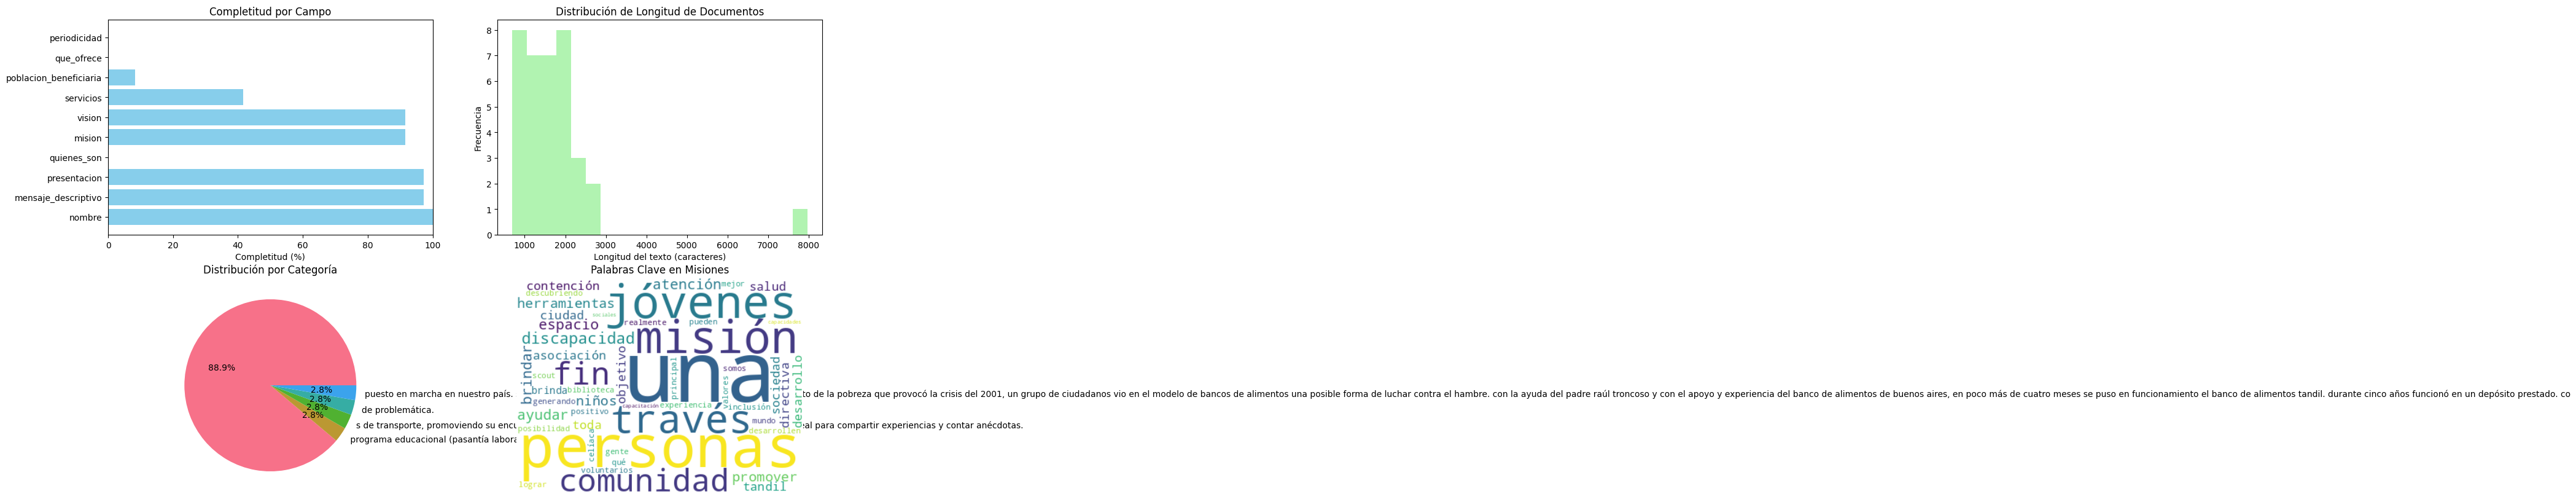

💾 Datos guardados en: ongs_procesadas.csv


In [ ]:
# Preprocesamiento de Datos de ONGs
# Proyecto: Sistema de Recomendación de ONGs con IA

# ============================================================================
# INSTALACIÓN DE LIBRERÍAS NECESARIAS
# ============================================================================

# Ejecutar en Google Colab
!pip install python-docx pandas matplotlib seaborn wordcloud nltk

# ============================================================================
# IMPORTACIÓN DE LIBRERÍAS
# ============================================================================

import pandas as pd
import numpy as np
import re
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from collections import Counter
from docx import Document
import warnings
warnings.filterwarnings('ignore')

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")

print("✅ Librerías importadas correctamente")

# ============================================================================
# FUNCIONES PARA EXTRACCIÓN DE DATOS
# ============================================================================

def extract_text_from_docx(file_path):
    """
    Extrae todo el texto de un archivo .docx
    """
    try:
        doc = Document(file_path)
        full_text = []

        for paragraph in doc.paragraphs:
            full_text.append(paragraph.text)

        return '\n'.join(full_text)
    except Exception as e:
        print(f"Error al procesar {file_path}: {str(e)}")
        return ""

def clean_text(text):
    """
    Limpia y normaliza el texto
    """
    if not text or pd.isna(text):
        return ""

    # Convertir a string y limpiar
    text = str(text).strip()
    # Eliminar múltiples espacios y saltos de línea
    text = re.sub(r'\s+', ' ', text)
    # Eliminar caracteres especiales problemáticos
    text = re.sub(r'[^\w\s\-.,;:()áéíóúüñÁÉÍÓÚÜÑ]', '', text)

    return text

def parse_ong_document(text):
    """
    Parsea un documento de ONG y extrae la información estructurada
    """
    ong_data = {
        'nombre': '',
        'mensaje_descriptivo': '',
        'presentacion': '',
        'quienes_son': '',
        'mision': '',
        'vision': '',
        'servicios': '',
        'poblacion_beneficiaria': '',
        'que_ofrece': '',
        'periodicidad': '',
        'horarios': '',
        'condiciones_acceso': '',
        'categoria': '',
        'ubicacion': '',
        'contacto': '',
        'encargado': '',
        'texto_completo': text
    }

    # Patrones para identificar secciones
    patterns = {
        'nombre': [r'nombre.*?:?\s*(.+?)(?:\n|$)', r'^(.+?)(?:\n|mensaje|presentaci)', r'ONG\s*:?\s*(.+?)(?:\n|$)'],
        'mensaje_descriptivo': [r'mensaje\s*descriptivo.*?:?\s*(.+?)(?:\n\n|\npresentaci)', r'descripci[oó]n.*?:?\s*(.+?)(?:\n\n|\nquienes)'],
        'presentacion': [r'presentaci[oó]n.*?:?\s*(.+?)(?:\n\n|\nquienes|\nmisi)', r'presentaci[oó]n\s*de\s*la\s*ong.*?:?\s*(.+?)(?:\n\n|\nquienes)'],
        'quienes_son': [r'qui[eé]nes?\s*son.*?:?\s*(.+?)(?:\n\n|\nmisi|\nvisi)', r'quienes\s*somos.*?:?\s*(.+?)(?:\n\n|\nmisi)'],
        'mision': [r'misi[oó]n.*?:?\s*(.+?)(?:\n\n|\nvisi|\nservici)', r'nuestra\s*misi[oó]n.*?:?\s*(.+?)(?:\n\n|\nvisi)'],
        'vision': [r'visi[oó]n.*?:?\s*(.+?)(?:\n\n|\nservici|\npoblaci)', r'nuestra\s*visi[oó]n.*?:?\s*(.+?)(?:\n\n|\nservici)'],
        'servicios': [r'servici.*?:?\s*(.+?)(?:\n\n|\npoblaci|\nque\s*ofrece)', r'descripci[oó]n.*?servici.*?:?\s*(.+?)(?:\n\n|\npoblaci)'],
        'poblacion_beneficiaria': [r'poblaci[oó]n\s*beneficiari.*?:?\s*(.+?)(?:\n\n|\nque\s*ofrece|\nperiodicidad)', r'beneficiari.*?:?\s*(.+?)(?:\n\n|\nque\s*ofrece)'],
        'que_ofrece': [r'qu[eé]\s*ofrece.*?:?\s*(.+?)(?:\n\n|\nperiodicidad|\nhorari)', r'ofrecemos.*?:?\s*(.+?)(?:\n\n|\nperiodicidad)'],
        'periodicidad': [r'periodicidad.*?:?\s*(.+?)(?:\n\n|\nhorari|\ncondici)', r'frecuencia.*?:?\s*(.+?)(?:\n\n|\nhorari)'],
        'horarios': [r'horari.*?:?\s*(.+?)(?:\n\n|\ncondici|\ncategor)', r'horarios?\s*de\s*atenci[oó]n.*?:?\s*(.+?)(?:\n\n|\ncondici)'],
        'condiciones_acceso': [r'condici.*?acceso.*?:?\s*(.+?)(?:\n\n|\ncategor|\nubicaci)', r'requisitos.*?:?\s*(.+?)(?:\n\n|\ncategor)'],
        'categoria': [r'categor[ií]a.*?:?\s*(.+?)(?:\n\n|\nubicaci|\ncontact)', r'tipo.*?:?\s*(.+?)(?:\n\n|\nubicaci)'],
        'ubicacion': [r'ubicaci[oó]n.*?:?\s*(.+?)(?:\n\n|\ncontact|\nencargad)', r'direcci[oó]n.*?:?\s*(.+?)(?:\n\n|\ncontact)'],
        'contacto': [r'contact.*?:?\s*(.+?)(?:\n\n|\nencargad|$)', r'tel[eé]fono.*?:?\s*(.+?)(?:\n\n|\nencargad)'],
        'encargado': [r'encargad.*?:?\s*(.+?)(?:\n\n|$)', r'responsable.*?:?\s*(.+?)(?:\n\n|$)']
    }

    # Normalizar texto para búsqueda
    text_lower = text.lower()

    # Extraer información usando patrones
    for field, field_patterns in patterns.items():
        for pattern in field_patterns:
            match = re.search(pattern, text_lower, re.DOTALL | re.IGNORECASE)
            if match:
                extracted = match.group(1).strip()
                if extracted and len(extracted) > 2:  # Evitar extracciones vacías o muy cortas
                    ong_data[field] = clean_text(extracted[:500])  # Limitar longitud
                    break

    return ong_data

# ============================================================================
# PROCESAMIENTO DE ARCHIVOS
# ============================================================================

def process_ong_documents(folder_path):
    """
    Procesa todos los documentos .docx en una carpeta
    """
    folder_path = Path(folder_path)
    docx_files = list(folder_path.glob("*.docx"))

    if not docx_files:
        print("❌ No se encontraron archivos .docx en la carpeta especificada")
        return pd.DataFrame()

    print(f"📄 Encontrados {len(docx_files)} archivos .docx")

    ongs_data = []

    for i, file_path in enumerate(docx_files, 1):
        print(f"Procesando archivo {i}/{len(docx_files)}: {file_path.name}")

        # Extraer texto del documento
        text = extract_text_from_docx(file_path)

        if text:
            # Parsear información estructurada
            ong_info = parse_ong_document(text)
            ong_info['archivo_fuente'] = file_path.name
            ongs_data.append(ong_info)
        else:
            print(f"⚠️  No se pudo extraer texto de {file_path.name}")

    # Crear DataFrame
    df = pd.DataFrame(ongs_data)

    print(f"✅ Procesamiento completado. {len(df)} ONGs procesadas correctamente")

    return df

# ============================================================================
# ANÁLISIS EXPLORATORIO
# ============================================================================

def analyze_data_quality(df):
    """
    Analiza la calidad de los datos extraídos
    """
    print("🔍 ANÁLISIS DE CALIDAD DE DATOS")
    print("=" * 50)

    # Información general
    print(f"📊 Total de ONGs: {len(df)}")
    print(f"📊 Total de campos: {len(df.columns)}")

    # Completitud por campo
    print("\n📈 COMPLETITUD POR CAMPO:")
    completeness = {}
    for col in df.columns:
        if col not in ['archivo_fuente', 'texto_completo']:
            non_empty = df[col].notna() & (df[col] != '') & (df[col] != ' ')
            completeness[col] = (non_empty.sum() / len(df)) * 100

    completeness_df = pd.DataFrame(list(completeness.items()),
                                 columns=['Campo', 'Completitud (%)'])
    completeness_df = completeness_df.sort_values('Completitud (%)', ascending=False)

    print(completeness_df.to_string(index=False))

    # Estadísticas de longitud de texto
    print(f"\n📏 ESTADÍSTICAS DE LONGITUD DE TEXTO:")
    text_lengths = df['texto_completo'].str.len()
    print(f"Longitud promedio: {text_lengths.mean():.0f} caracteres")
    print(f"Longitud mínima: {text_lengths.min():.0f} caracteres")
    print(f"Longitud máxima: {text_lengths.max():.0f} caracteres")

    return completeness_df

def create_visualizations(df):
    """
    Crea visualizaciones de los datos
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # 1. Completitud por campo
    completeness = {}
    for col in df.columns:
        if col not in ['archivo_fuente', 'texto_completo']:
            non_empty = df[col].notna() & (df[col] != '') & (df[col] != ' ')
            completeness[col] = (non_empty.sum() / len(df)) * 100

    fields = list(completeness.keys())[:10]  # Top 10 campos
    values = [completeness[f] for f in fields]

    axes[0,0].barh(fields, values, color='skyblue')
    axes[0,0].set_xlabel('Completitud (%)')
    axes[0,0].set_title('Completitud por Campo')
    axes[0,0].set_xlim(0, 100)

    # 2. Distribución de longitud de texto
    text_lengths = df['texto_completo'].str.len()
    axes[0,1].hist(text_lengths, bins=20, color='lightgreen', alpha=0.7)
    axes[0,1].set_xlabel('Longitud del texto (caracteres)')
    axes[0,1].set_ylabel('Frecuencia')
    axes[0,1].set_title('Distribución de Longitud de Documentos')

    # 3. Categorías más comunes (si hay datos)
    if 'categoria' in df.columns:
        categorias = df['categoria'].value_counts().head(8)
        if not categorias.empty:
            axes[1,0].pie(categorias.values, labels=categorias.index, autopct='%1.1f%%')
            axes[1,0].set_title('Distribución por Categoría')
        else:
            axes[1,0].text(0.5, 0.5, 'Sin datos de categorías', ha='center', va='center')
            axes[1,0].set_title('Distribución por Categoría')

    # 4. Nube de palabras de las misiones
    if 'mision' in df.columns:
        missions_text = ' '.join(df['mision'].dropna().astype(str))
        if missions_text.strip():
            # Palabras comunes en español para filtrar
            stop_words = ['de', 'la', 'el', 'en', 'y', 'a', 'que', 'es', 'se', 'del', 'los', 'un', 'por', 'con', 'las', 'al', 'lo', 'como', 'más', 'o', 'pero', 'sus', 'le', 'ha', 'me', 'si', 'sin', 'sobre', 'este', 'ya', 'todo', 'esta', 'su', 'hacer', 'son', 'dos', 'puede', 'tiempo', 'muy', 'cuando', 'uno', 'hasta', 'donde', 'mismo', 'ella', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'para', 'nuestra', 'nuestro', 'nuestros', 'nuestras']

            wordcloud = WordCloud(width=400, height=300,
                                background_color='white',
                                stopwords=set(stop_words),
                                max_words=50).generate(missions_text)
            axes[1,1].imshow(wordcloud, interpolation='bilinear')
            axes[1,1].axis('off')
            axes[1,1].set_title('Palabras Clave en Misiones')
        else:
            axes[1,1].text(0.5, 0.5, 'Sin datos de misiones', ha='center', va='center')
            axes[1,1].set_title('Palabras Clave en Misiones')

    plt.tight_layout()
    plt.show()

def show_sample_data(df, n=3):
    """
    Muestra ejemplos de datos extraídos
    """
    print("📋 EJEMPLOS DE DATOS EXTRAÍDOS")
    print("=" * 50)

    for i in range(min(n, len(df))):
        print(f"\n🏢 ONG #{i+1}:")
        print(f"Nombre: {df.iloc[i]['nombre'][:100]}...")
        print(f"Misión: {df.iloc[i]['mision'][:150]}...")
        print(f"Servicios: {df.iloc[i]['servicios'][:150]}...")
        print(f"Ubicación: {df.iloc[i]['ubicacion'][:100]}...")
        print("-" * 30)

# ============================================================================
# FUNCIÓN PRINCIPAL
# ============================================================================

def main_preprocessing(folder_path):
    """
    Función principal para el preprocesamiento
    """
    print("🚀 INICIANDO PREPROCESAMIENTO DE DATOS DE ONGs")
    print("=" * 60)

    # Procesar documentos
    df = process_ong_documents(folder_path)

    if df.empty:
        print("❌ No se pudieron procesar los documentos")
        return None

    # Análisis de calidad
    completeness_df = analyze_data_quality(df)

    # Mostrar ejemplos
    show_sample_data(df)

    # Crear visualizaciones
    create_visualizations(df)

    # Guardar datos procesados
    output_file = 'ongs_procesadas.csv'
    df.to_csv(output_file, index=False, encoding='utf-8')
    print(f"💾 Datos guardados en: {output_file}")

    return df

# ============================================================================
# INSTRUCCIONES DE USO
# ============================================================================

print("""
📝 INSTRUCCIONES DE USO:

1. Sube tus archivos .docx a Google Colab
2. Ejecuta todas las celdas hasta aquí
3. Usa la función main_preprocessing() especificando la ruta de tu carpeta:

   # Ejemplo:
   df = main_preprocessing('/content/documentos_ongs/')

   # O si subiste archivos directamente a /content/:
   df = main_preprocessing('/content/')

4. El script procesará todos los .docx y creará un DataFrame estructurado
5. Se generarán visualizaciones y análisis automáticamente
6. Los datos se guardarán en 'ongs_procesadas.csv'

¡Listo para procesar tus datos!
""")

df = main_preprocessing('/content/documentos_ongs/')